# Reproducing the Paper Figures

This notebook is dedicated to reproducing figures from the paper.

# Libraries

In [1]:
%matplotlib widget

import numpy as np 
from matplotlib.colors import Normalize
import pandas as pd
from datetime import datetime
import scipy 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import random
import sklearn
from sklearn.manifold import TSNE
from sklearn.metrics import f1_score, mean_squared_error, r2_score, make_scorer, mean_absolute_percentage_error, mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import svm, neighbors
from sklearn.svm import SVR
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RBF, Matern, RationalQuadratic, ConstantKernel
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from scipy.stats import norm
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import entropy

from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# Functions

In [2]:
from hte_li_brine_ai import *

# Load data

Below all the experimental and generated data are loaded and can be inspected.

## Load AI suggestions

In [3]:
batch1_ai = pd.read_excel('data/generated/batch-2023-01-29.xlsx')
batch2_ai = pd.read_excel('data/generated/TGA_batch_2023-02-22_02-35-30.xlsx')

In [4]:
batch1_ai.head()

,Unnamed: 0,total C,CO3 2-,total N,NH3,Li,Temperature (C),yield_gpr,std_gpr,yield_dtr,gpr_dtr_agreement,acquisition_policy
0,0,2.50,2.50,6.00,1.00,3.00,66,0.828049,0.324031,0.6325,0.195549,HY
1,1,2.00,2.00,6.00,2.00,2.75,66,0.794714,0.188567,0.6325,0.162214,HY
2,2,2.50,2.50,5.25,0.25,2.75,66,0.782542,0.308353,0.6325,0.150042,HY
3,3,2.25,2.25,5.75,1.25,2.25,66,0.767454,0.174074,0.6325,0.134954,HY
4,4,2.50,2.50,5.75,0.75,3.75,66,0.760168,0.456831,0.6325,0.127668,HY


In [5]:
batch2_ai.head()

,Unnamed: 0,init_C,init_N,init_Li,T,gpr_yield,std,fact_check,acquisition
0,1444,0.166667,0.333333,0.166667,66,-0.400134,0.351154,True,std
1,1629,0.166667,1.166667,0.166667,66,-0.328078,0.289295,True,std
2,1814,0.166667,2.000000,0.166667,66,-0.251631,0.256215,True,std
3,1999,0.166667,2.833333,0.166667,66,-0.227632,0.228918,True,std
4,8659,1.000000,2.000000,0.166667,66,-0.339778,0.202977,True,std


## Load Experimentally obtained batches

In [6]:
batch0 = pd.read_excel('data/clean/batch0_labeled.xlsx')
batch1 = pd.read_excel('data/clean/batch1_labeled.xlsx')
batch2 = pd.read_excel('data/clean/batch2_labeled.xlsx')

In [7]:
batch0 = batch0[batch0['T']==66]
batch0.head()

,Telescope_id,exp_id,init_C,init_N,init_Li,T,fini_Li,yield,acq_policy
0,CS-NRCan-014_A1,B0-0,0.5,4.5,1.0,66,0.720406,0.279594,EXP
1,CS-NRCan-014_A2,B0-1,1.0,4.5,1.0,66,0.660309,0.339691,EXP
2,CS-NRCan-014_A3,B0-2,1.5,4.5,1.0,66,0.735669,0.264331,EXP
3,CS-NRCan-014_A5,B0-3,1.0,6.0,1.0,66,0.621322,0.378678,EXP
4,CS-NRCan-014_A6,B0-4,1.5,6.0,1.0,66,0.655983,0.344017,EXP


In [8]:
batch1.head()

,Telescope_id,exp_id,init_C,init_N,init_Li,T,fini_Li,yield,acq_policy
0,CS-NRCan-CO2-003_B6,B1-0,2.488,6.00,2.735,66,0.73,0.733090,HY
1,CS-NRCan-CO2-003_B2,B1-1,1.980,6.00,2.498,66,0.71,0.715773,HY
2,CS-NRCan-CO2-003_C5,B1-2,2.536,5.25,2.498,66,0.76,0.695757,HY
3,CS-NRCan-CO2-003_B5,B1-3,2.170,5.75,2.020,66,0.78,0.613861,HY
4,CS-NRCan-CO2-003_C4,B1-4,2.550,5.75,3.450,66,0.69,0.800000,HY


In [9]:
batch2 = batch2[batch2['yield'] !=0]    
batch2.head()

,Telescope_id,exp_id,init_C,init_N,init_Li,T,fini_Li,yield,acq_policy
0,CS-NRCan-CO2-004_A1,B1-0,0.31,5.33,0.83,66,0.65,0.216867,RND
1,CS-NRCan-CO2-005_B1,B1-1,0.23,2.17,2.00,66,0.90,0.550000,RND
3,CS-NRCan-CO2-007_A3,B1-3,0.50,3.83,2.33,66,0.85,0.635193,HY
4,CS-NRCan-CO2-008_B5,B1-4,0.23,3.00,3.00,66,1.08,0.640000,HY
5,CS-NRCan-CO2-009_B2,B1-5,0.36,3.83,3.50,66,0.98,0.720000,HY


### Visual inspection of experimental data:

In [10]:
batch_0_1 = pd.concat([batch0, batch1])
batch_0_2 = pd.concat([batch_0_1, batch2])

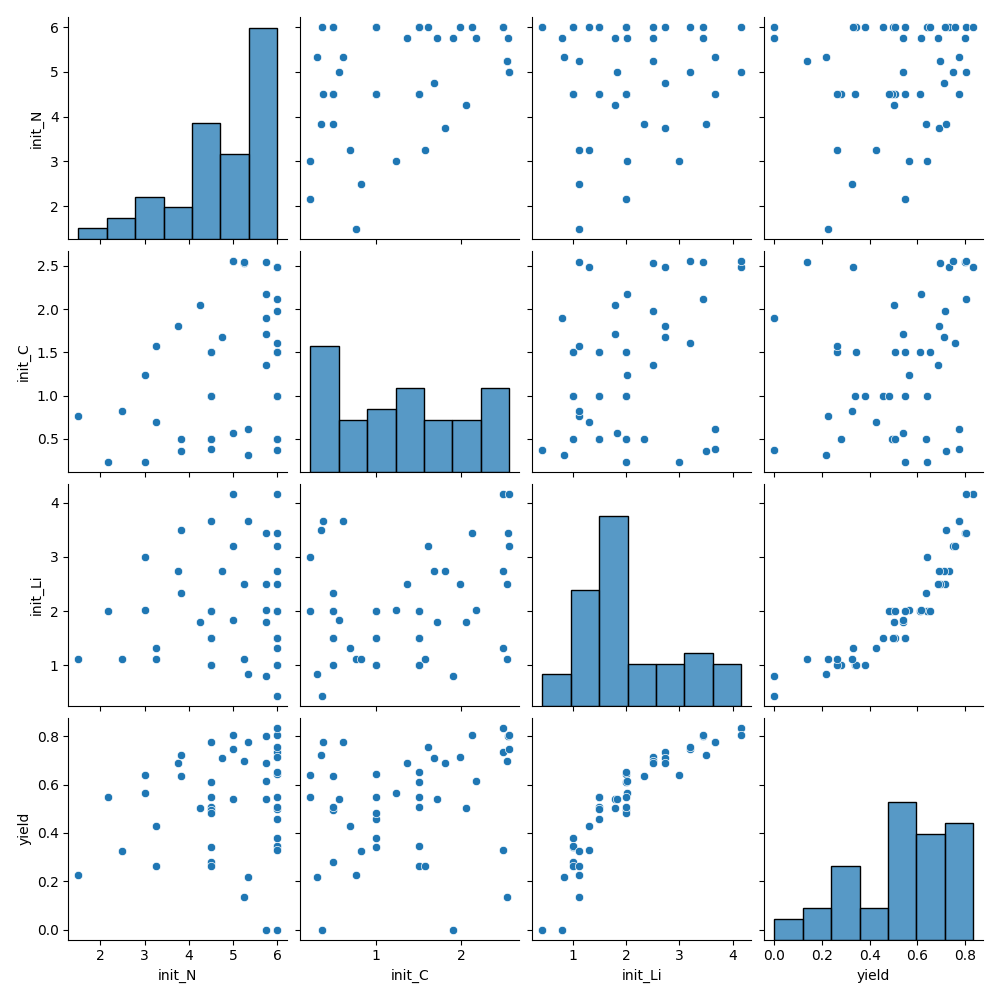

In [11]:
sns.pairplot(batch_0_2, x_vars=['init_N', 'init_C', 'init_Li', 'yield'],
             y_vars=['init_N', 'init_C', 'init_Li', 'yield'], palette='viridis')
plt.show()

# GPR Prediction Results
 

## Visualizing the model evolution

>Scale the data
>
>Define 3 different models, one for each batch. 
>
>Train each model with the data from each batch.
>
>eighther define the experimental space and plot the vizualization of the prediction in a good cross section.

In [12]:
def binary_model_plot_v3(model, scaler, range_a, range_b, val_c,
                         label_a, label_b , label_c, entropy_contour=False,
                         std_contour=True, yield_contour=True, vmin=0.1, vmax=0.7):

    
    a_list = np.linspace(range_a[0], range_a[1], 70)
    b_list = np.linspace(range_b[0], range_b[1], 70)

    a_mesh, b_mesh = np.meshgrid(a_list, b_list)
    yield_mesh = a_mesh.copy()
    std_mesh = a_mesh.copy()
    entropy_mesh = a_mesh.copy()
    
    for i in tqdm(range(len(a_list))):
        for j in range(len(b_list)):
            x_df = pd.DataFrame({label_a: a_mesh[i,j],
                                 label_b : b_mesh[i,j],
                                 label_c : [val_c]})
            # it is crucial to rearrange the columns in the same order as the training data!!!
            x_df = x_df[['init_C', 'init_N', 'init_Li']]
            
            scaled_grid = scaler.transform(x_df)
            yield_mesh[i,j], std_mesh[i,j] = model.predict(scaled_grid, return_std=True)
            yield_mesh[i,j] = np.maximum(0, yield_mesh[i,j])
            if entropy_contour:
                entropy_mesh[i,j] = entropy_measure(std_mesh[i,j])
            
    plt.figure(figsize=(4.5,3.9))
    
    #contour_plot = plt.contourf(a_mesh, b_mesh, yield_mesh, 100, cmap = 'viridis', vmin=vmin, vmax=vmax)
    contour_plot = plt.contourf(a_mesh, b_mesh, yield_mesh,cmap = 'viridis', levels=np.linspace(vmin,vmax,400))
    cbar = plt.colorbar(contour_plot, norm = Normalize(vmin=vmin, vmax=vmax))
    # Specify the tickmark locations
    tickmarks = np.arange(vmin, vmax, 0.1)  # change step size as needed

    # Set the tickmarks on the colorbar
    cbar.set_ticks(tickmarks)
    
    if std_contour:
        contour1 = plt.contour(a_mesh, b_mesh, std_mesh, colors = 'red')
        plt.clabel(contour1, inline=True, fontsize=10)
    
    if yield_contour:
        contour2 = plt.contour(a_mesh, b_mesh, yield_mesh, 9, linestyles='-.', colors = 'black')
        plt.clabel(contour2, inline=True, fontsize=10)
    
    if entropy_contour:
        contour3 = plt.contour(a_mesh, b_mesh, entropy_mesh, colors = 'blue')
        plt.clabel(contour3, inline=True, fontsize=10)
    
        
    
    plt.xlabel(label_a)
    plt.ylabel(label_b)
    cbar.ax.set_ylabel('Yield')
    plt.title(label_c + ": " + str(val_c))
    plt.show()
    plt.tight_layout()
    
    return a_mesh, b_mesh, yield_mesh, std_mesh, entropy_mesh


In [13]:
# scale the data

scale_0 = StandardScaler().fit(batch0[['init_C', 'init_N', 'init_Li']])
scale_1 = StandardScaler().fit(batch1[['init_C', 'init_N', 'init_Li']])
scale_2 = StandardScaler().fit(batch2[['init_C', 'init_N', 'init_Li']])
scale_0_1 = StandardScaler().fit(batch_0_1[['init_C', 'init_N', 'init_Li']])
scale_0_2 = StandardScaler().fit(batch_0_2[['init_C', 'init_N', 'init_Li']])

batch0_scaled = scale_0.transform(batch0[['init_C', 'init_N', 'init_Li']])
batch1_scaled = scale_1.transform(batch1[['init_C', 'init_N', 'init_Li']])
batch2_scaled = scale_2.transform(batch2[['init_C', 'init_N', 'init_Li']])
batch_0_1_scaled = scale_0_1.transform(batch_0_1[['init_C', 'init_N', 'init_Li']])
batch_0_2_scaled = scale_0_2.transform(batch_0_2[['init_C', 'init_N', 'init_Li']])  

In [14]:
# define 3 models with with kernels with 3 different lengthscales
gpr_model_0 = GaussianProcessRegressor(kernel=Matern(length_scale= [1,1,1], nu=1.5), alpha = 1e-5, n_restarts_optimizer=5)
gpr_model_1 = GaussianProcessRegressor(kernel=Matern(length_scale= [1,1,1], nu=1.5), alpha = 1e-5, n_restarts_optimizer=5)
gpr_model_2 = GaussianProcessRegressor(kernel=Matern(length_scale= [1, 1,1], nu=1.5), alpha = 1e-5, n_restarts_optimizer=5)

gpr_model_0_1 = GaussianProcessRegressor(kernel=Matern(length_scale= [1,1,1], nu=1.5), alpha = 1e-5, n_restarts_optimizer=5)
gpr_model_0_2 = GaussianProcessRegressor(kernel=Matern(length_scale= [1,1,1], nu=1.5), alpha = 1e-5, n_restarts_optimizer=5)

In [15]:
gpr_model_0.fit(batch0_scaled, batch0['yield'])
gpr_model_1.fit(batch1_scaled, batch1['yield'])
gpr_model_2.fit(batch2_scaled, batch2['yield'])
gpr_model_0_1.fit(batch_0_1_scaled, batch_0_1['yield'])
gpr_model_0_2.fit(batch_0_2_scaled, batch_0_2['yield'])

print(gpr_model_0.kernel_)
print(gpr_model_1.kernel_)
print(gpr_model_2.kernel_)
print(gpr_model_0_1.kernel_)
print(gpr_model_0_2.kernel_)    

Matern(length_scale=[10.1, 13.7, 7.76], nu=1.5)
Matern(length_scale=[29.5, 12.6, 6.53], nu=1.5)
Matern(length_scale=[1e+05, 178, 6.6], nu=1.5)
Matern(length_scale=[5.76, 14.2, 4.34], nu=1.5)
Matern(length_scale=[6.49, 13.9, 3.25], nu=1.5)


### Iteration 0:

Demonstration of different slices of prediction using the data from the first iteration of active learning 

100%|██████████| 70/70 [00:07<00:00,  9.21it/s]


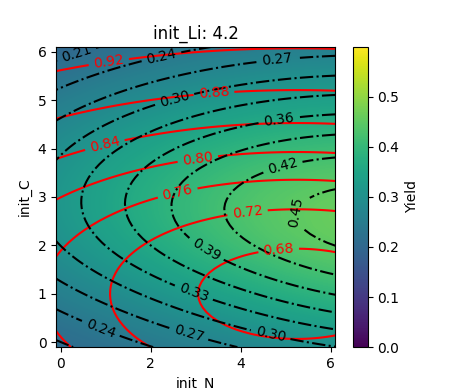

In [16]:
a_mesh_0, b_mesh_0, yield_mesh_0, std_mesh_0, _ =  binary_model_plot_v3(gpr_model_0,
                                                                     scale_0,
                                                                     range_a = [-0.1, 6.1],
                                                                     range_b = [-0.1, 6.1],
                                                                     val_c=4.2,
                                                                     label_a = 'init_N',
                                                                     label_b = 'init_C',
                                                                     label_c = 'init_Li',
                                                                     vmin=0, vmax=0.6)

## Iteration 1:

Demonstration of different slices of prediction using the data from the second iteration of active learning 

100%|██████████| 70/70 [00:07<00:00,  9.34it/s]


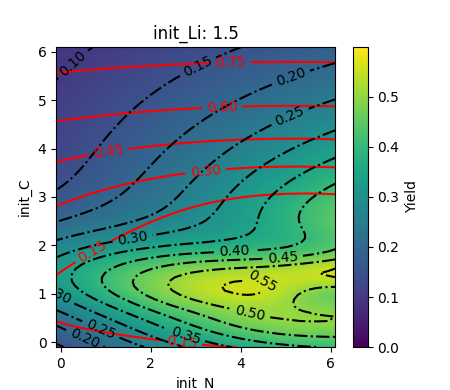

In [25]:
a_mesh_0_1, b_mesh_0_1, yield_mesh_0_1, std_mesh_0_1 , _ =  binary_model_plot_v3(gpr_model_0_1,
                                                                     scale_0_1,
                                                                     range_a = [-0.1, 6.1],
                                                                     range_b = [-0.1, 6.1],
                                                                     val_c=1.5,
                                                                     label_a = 'init_N',
                                                                     label_b = 'init_C',
                                                                     label_c = 'init_Li',
                                                                     vmin=0, vmax=0.6)


## Iteration 2:

Demonstration of different slices of prediction using the data from the third iteration of active learning 

100%|██████████| 70/70 [00:07<00:00,  9.86it/s]


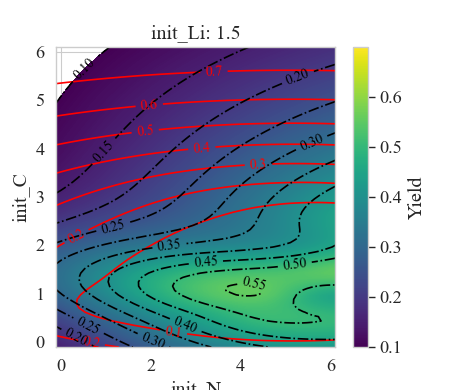

In [134]:
a_mesh_0_1, b_mesh_0_1, yield_mesh_0_1, std_mesh_0_1 , _ =  binary_model_plot_v3(gpr_model_0_1,
                                                                     scale_0_1,
                                                                     range_a = [-0.1, 6.1],
                                                                     range_b = [-0.1, 6.1],
                                                                     val_c=1.5,
                                                                     label_a = 'init_N',
                                                                     label_b = 'init_C',
                                                                     label_c = 'init_Li')


plt.scatter(batch0['init_N'], batch0['init_Li'], marker = '^', s=30, color = 'cyan', zorder=10)

plt.scatter(batch1[batch1['acq_policy']=='RND']['init_N'],
            batch1[batch1['acq_policy']=='RND']['init_Li'],
            marker = 'x', s=36, color = 'red', zorder=15)

plt.scatter(batch1[batch1['acq_policy']=='HY']['init_N'],
            batch1[batch1['acq_policy']=='HY']['init_Li'],
            marker = 'x', s=36, color = 'blue', zorder=15)

plt.scatter(batch1[batch1['acq_policy']=='HAG']['init_N'],
            batch1[batch1['acq_policy']=='HAG']['init_Li'],
            marker = 'x', s=36, color = 'black', zorder=15)

## Visualize the highest yield slice: 

100%|██████████| 70/70 [00:07<00:00,  8.92it/s]


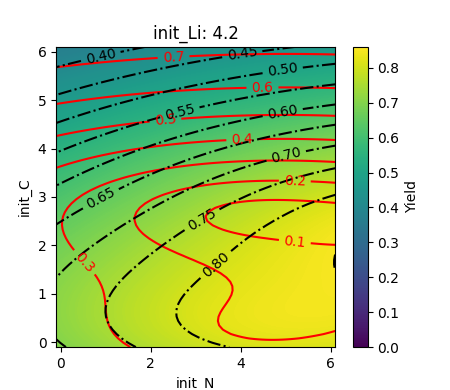

In [30]:
a_mesh_0, b_mesh_0, yield_mesh_0, std_mesh_0, _ =  binary_model_plot_v3(gpr_model_0_2,
                                                                        scale_0_2,
                                                                        range_a = [-0.1, 6.1],
                                                                        range_b = [-0.1, 6.1],
                                                                        val_c=4.2,
                                                                        label_a = 'init_N',
                                                                        label_b = 'init_C',
                                                                        label_c = 'init_Li',
                                                                        vmin=0.0, vmax=0.86)

100%|██████████| 70/70 [00:08<00:00,  8.32it/s]


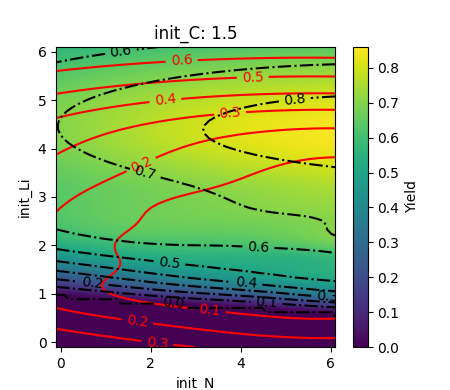

In [31]:
a_mesh_1, b_mesh_1, yield_mesh_1, std_mesh_1, _ =  binary_model_plot_v3(gpr_model_0_2,
                                                                        scale_0_2,
                                                                        range_a = [-0.1, 6.1],
                                                                        range_b = [-0.1, 6.1],
                                                                        val_c=1.5,
                                                                        label_a = 'init_N',
                                                                        label_b = 'init_Li',
                                                                        label_c = 'init_C',
                                                                        vmin=0.0, vmax=0.86)

100%|██████████| 70/70 [00:08<00:00,  7.84it/s]


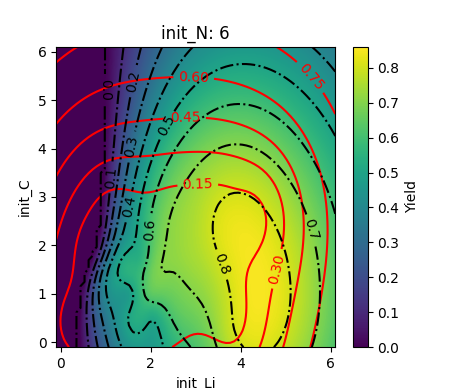

In [32]:
a_mesh_2, b_mesh_2, yield_mesh_2, std_mesh_2, _ =  binary_model_plot_v3(gpr_model_0_2,
                                                                        scale_0_2,
                                                                        range_a = [-0.1, 6.1],
                                                                        range_b = [-0.1, 6.1],
                                                                        val_c=6,
                                                                        label_a = 'init_Li',
                                                                        label_b = 'init_C',
                                                                        label_c = 'init_N',
                                                                        vmin=0.0, vmax=0.86)

# Experimentally Viable Regions: 

100%|██████████| 125000/125000 [00:03<00:00, 38909.81it/s]


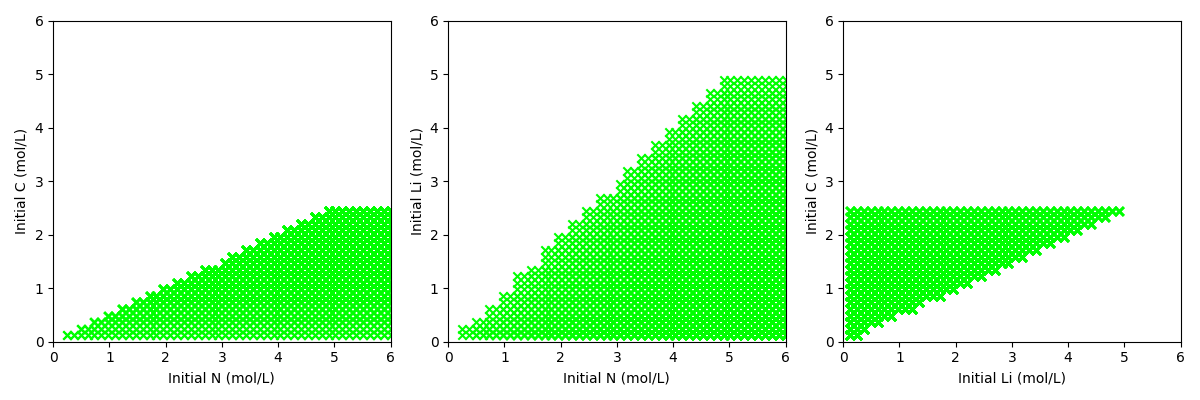

In [17]:
exp_grid_loaded = pd.read_csv('exp_grid.csv')
exp_grid = exp_grid_loaded.copy()

exp_grid_feasibility = grid_feasibility_v2(exp_grid_loaded)

fig, axes = plt.subplots(1, 3, figsize=(12, 4)) # 1 row, 3 columns

filtered_data = exp_grid_feasibility[exp_grid_feasibility['fact_check'] == True]

# First plot (N vs C)
axes[0].scatter(filtered_data['init_N'], filtered_data['init_C'], marker='x', color='lime')
axes[0].set_xlabel('Initial N (mol/L)')
axes[0].set_ylabel('Initial C (mol/L)')
axes[0].set_xlim(0, 6)
axes[0].set_ylim(0, 6)

# Second plot (Li vs N)
axes[1].scatter(filtered_data['init_N'], filtered_data['init_Li'], marker='x', color='lime')
axes[1].set_xlabel('Initial N (mol/L)')
axes[1].set_ylabel('Initial Li (mol/L)')
axes[1].set_xlim(0, 6)
axes[1].set_ylim(0, 6)

# Third plot (C vs Li)
axes[2].scatter(filtered_data['init_Li'], filtered_data['init_C'], marker='x', color='lime')
axes[2].set_xlabel('Initial Li (mol/L)')
axes[2].set_ylabel('Initial C (mol/L)')
axes[2].set_xlim(0, 6)
axes[2].set_ylim(0, 6)



plt.tight_layout()
plt.show()


# Comparing model performance in finding Max yield:

## Measure the std of the model predictions 

In [30]:
exp_grid_loaded = pd.read_csv('exp_grid.csv')
exp_grid = exp_grid_loaded.copy()
exp_grid_feasibility = grid_feasibility_v2(exp_grid_loaded)
exp_grid_temp = exp_grid_feasibility[exp_grid_feasibility['fact_check']==True][['init_C', 'init_N', 'init_Li']].copy()

100%|██████████| 125000/125000 [00:02<00:00, 42103.85it/s]


In [31]:
exp_grid_scaled_0 = scale_0.transform(exp_grid_loaded[['init_C', 'init_N', 'init_Li']])
exp_grid_scaled_0_1 = scale_0_1.transform(exp_grid_loaded[['init_C', 'init_N', 'init_Li']])
exp_grid_scaled_0_2 = scale_0_2.transform(exp_grid_loaded[['init_C', 'init_N', 'init_Li']]) 

In [32]:
y_pred_0, std_0 = gpr_model_0.predict(exp_grid_scaled_0, return_std=True)
y_pred_0_1, std_0_1 = gpr_model_0_1.predict(exp_grid_scaled_0_1, return_std=True)
y_pred_0_2, std_0_2 = gpr_model_0_2.predict(exp_grid_scaled_0_2, return_std=True)


y_pred_0 = np.maximum(0, y_pred_0)
y_pred_0_1 = np.maximum(0, y_pred_0_1)  
y_pred_0_2 = np.maximum(0, y_pred_0_2)  


In [33]:
exp_grid_feasibility['gpr_yield_0'] = y_pred_0.copy()
exp_grid_feasibility['gpr_std_0'] = std_0.copy()
exp_grid_feasibility['gpr_yield_0_1'] = y_pred_0_1.copy()
exp_grid_feasibility['gpr_std_0_1'] = std_0_1.copy()
exp_grid_feasibility['gpr_yield_0_2'] = y_pred_0_2.copy()
exp_grid_feasibility['gpr_std_0_2'] = std_0_2.copy()


In [34]:
# Initialize an empty list to store aggregated std values
all_simulated_std = []

np.random.seed(42)

#generate 10 random seeds
random_seeds_list = np.random.randint(0, 100, 100)

# plt.figure(figsize=(8, 6))
# Loop through 100 different random seeds
experimental_std_0_1_all = []   
experimental_std_0_2_all = []   


for seed in random_seeds_list:
    
    scale_0_1 = StandardScaler()
    scale_0_1 = scale_0_1.fit(batch_0_1[['init_C', 'init_N', 'init_Li']])
    batch_0_1_scaled = scale_0_1.transform(batch_0_1[['init_C', 'init_N', 'init_Li']])
    simulated_extraction_scaled_0_1 = scale_0_1.transform(exp_grid_temp)
    
    scale_0_2 = StandardScaler()
    scale_0_2 = scale_0_2.fit(batch_0_2[['init_C', 'init_N', 'init_Li']])
    batch_0_2_scaled = scale_0_2.transform(batch_0_2[['init_C', 'init_N', 'init_Li']])  
    simulated_extraction_scaled_0_2 = scale_0_2.transform(exp_grid_temp)
    
    gpr_model_experimental_0_1 = GaussianProcessRegressor(kernel=Matern(length_scale= [1,1,1], nu=1.5), alpha = 1e-10, n_restarts_optimizer=5, random_state=seed) 
    gpr_model_experimental_0_1.fit(batch_0_1_scaled, batch_0_1['yield'])
    
    
    gpr_model_experimental_0_2 = GaussianProcessRegressor(kernel=Matern(length_scale= [1,1,1], nu=1.5), alpha = 1e-10, n_restarts_optimizer=5, random_state=seed) 
    gpr_model_experimental_0_2.fit(batch_0_2_scaled, batch_0_2['yield'])
    
    experimental_yield_0_1, experimental_std_0_1 = gpr_model_0_1.predict(batch_0_1_scaled, return_std=True)
    experimental_yield_0_2, experimental_std_0_2 = gpr_model_0_2.predict(batch_0_2_scaled, return_std=True)
    
    experimental_std_0_1_all.append(experimental_std_0_1)
    experimental_std_0_2_all.append(experimental_std_0_2)


    np.random.seed(seed)
        
    # select number of experiments/rows to be randomly extracted from the exp_grid_loaded_temp dataframe
    rows = 24

    # randomly select rows from the dataframe
    row_indexs = np.random.choice(exp_grid_temp.index.values, rows, replace=False)

    # create a new dataframe with the randomly selected rows
    exp_grid_random_rows = exp_grid_temp.loc[row_indexs]

    # extract the columns of interest: init_C, init_N, init_Li
    exp_grid_random_rows_extracted = exp_grid_random_rows[['init_C', 'init_N', 'init_Li']]

    # add or subtract a random value within the 10% of each element in the new dataframe
    simulated_extraction = exp_grid_random_rows_extracted.copy()

    simulated_extraction = simulated_extraction + np.random.uniform(-0.1, 0.1, simulated_extraction.shape)*simulated_extraction

    # replace negative values with 0
    simulated_extraction[simulated_extraction < 0] = 0

    # Scale and train the new experimental data based on the batch_0_2 data and model
    b_0_2_scaler = StandardScaler()
    b_0_2_scaler = b_0_2_scaler.fit_transform(batch_0_2[['init_C', 'init_N', 'init_Li']])

    simulated_extraction_scaled = scale_0_2.transform(simulated_extraction) 

    simulated_extraction_yield, simulated_extraction_std = gpr_model_0_2.predict(simulated_extraction_scaled, return_std=True)

    # add a random noise in within 10% of the predicted yield value:
    simulated_extraction_yield_noisy = simulated_extraction_yield + np.random.uniform(-0.1, 0.1, simulated_extraction_yield.shape)*simulated_extraction_yield
    #+ simulated_extraction_std * np.random.randn(*simulated_extraction_yield.shape)


    # replace negative values with 0
    simulated_extraction_yield_noisy[simulated_extraction_yield_noisy < 0] = 0
    
    simulated_extraction = pd.concat([simulated_extraction, batch0[['init_C', 'init_N', 'init_Li']]], ignore_index=True)
    #print(simulated_extraction.shape)
    simulated_extraction_yield_noisy = np.concatenate((simulated_extraction_yield_noisy, batch0['yield'].values))
    #print(simulated_extraction_yield_noisy.shape)

    # now scale the data in the columns of simulated extraction and train a new model based on the this data and then predict the yield and std on the whole exp_grid
    temp_mesh = exp_grid_temp[['init_C', 'init_N', 'init_Li']].copy()
    simulated_extraction_self_scaler = StandardScaler()
    simulated_extraction_self_scaled = simulated_extraction_self_scaler.fit_transform(simulated_extraction)
    temp_mesh_scaled = simulated_extraction_self_scaler.transform(temp_mesh) 


    gpr_model_simulated = GaussianProcessRegressor(kernel=Matern(length_scale= [1,1,1], nu=1.5), alpha = 1e-10, n_restarts_optimizer=5) 

    gpr_model_simulated.fit(simulated_extraction_self_scaled, simulated_extraction_yield_noisy)
    simulated_yield, simulated_std = gpr_model_simulated.predict(temp_mesh_scaled, return_std=True)   
    #print(simulated_std.shape)
    
    all_simulated_std.append(simulated_std)

# Convert the list of arrays to a numpy array
all_simulated_std_array = np.array(all_simulated_std)

# Calculate the average std at each point in the mesh grid
averaged_all_simulated_std_batch_1 = np.mean(all_simulated_std_array, axis=0)

print(averaged_all_simulated_std_batch_1.shape)



averaged_all_experimental_std_0_1 = np.mean(np.array(experimental_std_0_1_all), axis=0)
averaged_all_experimental_std_0_2 = np.mean(np.array(experimental_std_0_2_all), axis=0)



(9326,)


In [35]:
# Initialize an empty list to store aggregated std values
all_simulated_std = []
np.random.seed(42)
#generate 10 random seeds
random_seeds_list = np.random.randint(0, 100, 100)

# plt.figure(figsize=(8, 6))
# Loop through 100 different random seeds
for seed in random_seeds_list:
    np.random.seed(seed)
        
    # select number of experiments/rows to be randomly extracted from the exp_grid_loaded_temp dataframe
    rows = 47

    # randomly select rows from the dataframe
    row_indexs = np.random.choice(exp_grid_temp.index.values, rows, replace=False)

    # create a new dataframe with the randomly selected rows
    exp_grid_random_rows = exp_grid_temp.loc[row_indexs]

    # extract the columns of interest: init_C, init_N, init_Li
    exp_grid_random_rows_extracted = exp_grid_random_rows[['init_C', 'init_N', 'init_Li']]

    # add or subtract a random value within the 10% of each element in the new dataframe
    simulated_extraction = exp_grid_random_rows_extracted.copy()

    simulated_extraction = simulated_extraction + np.random.uniform(-0.1, 0.1, simulated_extraction.shape)*simulated_extraction

    # replace negative values with 0
    simulated_extraction[simulated_extraction < 0] = 0

    # Scale and train the new experimental data based on the batch_0_2 data and model
    b_0_2_scaler = StandardScaler()
    b_0_2_scaler = b_0_2_scaler.fit_transform(batch_0_2[['init_C', 'init_N', 'init_Li']])

    simulated_extraction_scaled = scale_0_2.transform(simulated_extraction) 

    simulated_extraction_yield, simulated_extraction_std = gpr_model_0_2.predict(simulated_extraction_scaled, return_std=True)

    # add a random noise in within 10% of the predicted yield value:
    simulated_extraction_yield_noisy = simulated_extraction_yield + np.random.uniform(-0.1, 0.1, simulated_extraction_yield.shape)*simulated_extraction_yield
    # simulated_extraction_std * np.random.randn(*simulated_extraction_yield.shape)

    # replace negative values with 0
    simulated_extraction_yield_noisy[simulated_extraction_yield_noisy < 0] = 0
    
    simulated_extraction = pd.concat([simulated_extraction, batch0[['init_C', 'init_N', 'init_Li']]], ignore_index=True)
    #print(simulated_extraction.shape)
    simulated_extraction_yield_noisy = np.concatenate((simulated_extraction_yield_noisy, batch0['yield'].values))
    #print(simulated_extraction_yield_noisy.shape)

    # now scale the data in the columns of simulated extraction and train a new model based on the this data and then predict the yield and std on the whole exp_grid
    temp_mesh = exp_grid_temp[['init_C', 'init_N', 'init_Li']].copy()
    simulated_extraction_self_scaler = StandardScaler()
    simulated_extraction_self_scaled = simulated_extraction_self_scaler.fit_transform(simulated_extraction)
    temp_mesh_scaled = simulated_extraction_self_scaler.transform(temp_mesh) 


    gpr_model_simulated = GaussianProcessRegressor(kernel=Matern(length_scale= [1,1,1], nu=1.5), alpha = 1e-10, n_restarts_optimizer=5) 

    gpr_model_simulated.fit(simulated_extraction_self_scaled, simulated_extraction_yield_noisy)
    simulated_yield, simulated_std = gpr_model_simulated.predict(temp_mesh_scaled, return_std=True)   
    #print(simulated_std.shape)
    
    all_simulated_std.append(simulated_std)

# Convert the list of arrays to a numpy array
all_simulated_std_array = np.array(all_simulated_std)

# Calculate the average std at each point in the mesh grid
averaged_all_simulated_std_batch_2 = np.mean(all_simulated_std_array, axis=0)

print(averaged_all_simulated_std_batch_2.shape)



(9326,)


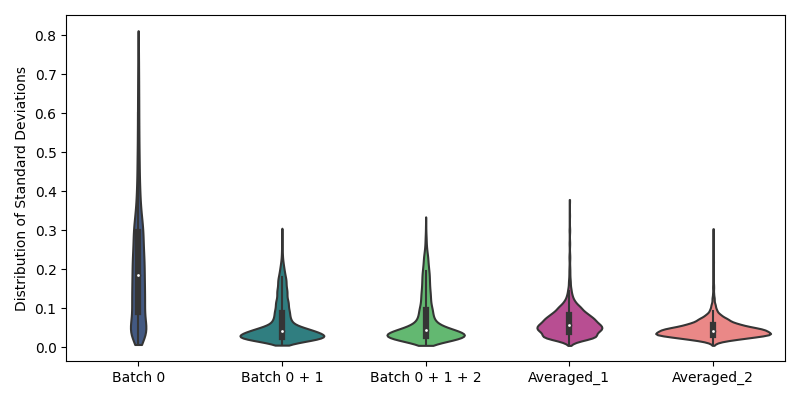

In [36]:

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

std_mesh_0_flat = exp_grid_feasibility[exp_grid_feasibility['fact_check']==True]['gpr_std_0']
std_mesh_0_1_flat = exp_grid_feasibility[exp_grid_feasibility['fact_check']==True]['gpr_std_0_1']
std_mesh_0_2_flat = exp_grid_feasibility[exp_grid_feasibility['fact_check']==True]['gpr_std_0_2']

# Create a dataframe from your data
data = pd.DataFrame({
    'Batch': ['Batch 0']*len(std_mesh_0_flat) + ['Batch 0 + 1']*len(std_mesh_0_1_flat) + ['Batch 0 + 1 + 2']*len(std_mesh_0_2_flat) + ['Averaged_1']*len(averaged_all_simulated_std_batch_1) + ['Averaged_2']*len(averaged_all_simulated_std_batch_2),
    'Value': np.concatenate((std_mesh_0_flat, std_mesh_0_1_flat, std_mesh_0_2_flat, averaged_all_simulated_std_batch_1, averaged_all_simulated_std_batch_2))
})

# Define the custom palette
custom_palette = {
    'Batch 0': '#39568CFF',
    'Batch 0 + 1': '#238A8DFF',
    'Batch 0 + 1 + 2': '#55C667FF',
    'Averaged_1': '#CA3C97',
    'Averaged_2': '#FA7876'
}

fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(111)
sns.violinplot(x='Batch', y='Value', data=data, palette=custom_palette, ax=ax1, cut=0)

ax1.set_ylabel('Distribution of Standard Deviations')
ax1.set_xlabel('')
ax1.grid(False)  # Hide the grid

# Customize axis spines
for spine in ax1.spines.values():  
    spine.set_edgecolor('black')

fig.tight_layout()
plt.show()


### Violin plots for batches Vs randomly selected data

In [152]:
# create 10 batches of size 24 with different random seeds
# the batches are rows  exp_grid_feasibility with feasible = True
np.random.seed(42)
random_seeds = np.random.randint(0, 1000, size=10)
print(random_seeds)

# [167 259 753 224 976 563 334 530 859  25]

[102 435 860 270 106  71 700  20 614 121]


In [153]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold
import pandas as pd
import numpy as np

def k_fold_cross_validation(X, y, random_state=42):
    kf = KFold(n_splits=5, shuffle=True, random_state = random_state)
    r2_scores = []
    mae_scores = []
    mse_scores = [] # MASE is not a built-in metric, you may need to compute this differently or implement your own function

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        gpr_model = GaussianProcessRegressor(kernel=Matern(length_scale=[1,1,1], nu=1.5), alpha=1e-10, n_restarts_optimizer=5)
        gpr_model.fit(X_train_scaled, y_train)
        y_pred = gpr_model.predict(X_test_scaled)

        r2_scores.append(r2_score(y_test, y_pred))
        mae_scores.append(mean_absolute_error(y_test, y_pred))
        mse_scores.append(mean_squared_error(y_test, y_pred))
        # Compute MASE as per your requirements

    return r2_scores, mae_scores, mse_scores

batch_1_random = []
batch_2_random = []

# Assuming random_seeds is an existing list of random seeds
for i in random_seeds:
    batch_1_random.append(exp_grid_feasibility.sample(n=24, random_state=i))
    batch_2_random.append(exp_grid_feasibility.sample(n=24+23, random_state=i))



y_pred_grid_random_1 = []
std_grid_random_1 = []
y_pred_grid_random_2 = []
std_grid_random_2 = []

r2_kfold_batch1_random = []
mae_kfold_batch1_random = []
mse_kfold_batch1_random = []

r2_kfold_batch2_random = []
mae_kfold_batch2_random = []
mse_kfold_batch2_random = []

for batch1_random_sampled_df in batch_1_random:
    # batch 1 sampled is a dataframe
    # Repeat the following steps for batch1_random_sampled_df
    batch0_x_train = batch0[['init_C', 'init_N', 'init_Li']].copy()
    batch1_random_x_train = batch1_random_sampled_df[['init_C', 'init_N', 'init_Li']].copy()

    batch0_y_train = batch0['yield']
    batch1_random_y_train = batch1_random_sampled_df['gpr_yield_0_2']

    batch_temp_x = pd.concat([batch0_x_train, batch1_random_x_train])
    batch_temp_y = pd.concat([batch0_y_train, batch1_random_y_train])

    scaler = StandardScaler()
    batch_temp_x_scaled = scaler.fit_transform(batch_temp_x)

    gpr_model_temp = GaussianProcessRegressor(kernel=Matern(length_scale=[1,1,1], nu=1.5), alpha=1e-10, n_restarts_optimizer=5)
    gpr_model_temp.fit(batch_temp_x_scaled, batch_temp_y)

    exp_grid_feasibility_temp = exp_grid_feasibility.copy()
    exp_grid_feasibility_temp_x_test = exp_grid_feasibility_temp[['init_C', 'init_N', 'init_Li']].copy()
    exp_grid_feasibility_temp_x_test_scaled = scaler.transform(exp_grid_feasibility_temp_x_test)

    y_pred_temp, std_temp = gpr_model_temp.predict(exp_grid_feasibility_temp_x_test_scaled, return_std=True)

    y_pred_grid_random_1.append(y_pred_temp)
    std_grid_random_1.append(std_temp)

    r2_temp, mae_temp, mse_temp = k_fold_cross_validation(batch_temp_x, batch_temp_y)

    r2_kfold_batch1_random.append(np.mean(r2_temp))
    mae_kfold_batch1_random.append(np.mean(mae_temp))
    mse_kfold_batch1_random.append(np.mean(mse_temp))



for batch2_random_sampled_df in batch_2_random:
    # batch 2 sampled is a dataframe
    # Repeat the following steps for batch2_random_sampled_df
    batch0_x_train = batch0[['init_C', 'init_N', 'init_Li']].copy()
    batch2_random_x_train = batch2_random_sampled_df[['init_C', 'init_N', 'init_Li']].copy()

    batch0_y_train = batch0['yield']
    batch2_random_y_train = batch2_random_sampled_df['gpr_yield_0_2']

    batch_temp_x = pd.concat([batch0_x_train, batch2_random_x_train])
    batch_temp_y = pd.concat([batch0_y_train, batch2_random_y_train])

    scaler = StandardScaler()
    batch_temp_x_scaled = scaler.fit_transform(batch_temp_x)

    gpr_model_temp = GaussianProcessRegressor(kernel=Matern(length_scale=[1,1,1], nu=1.5), alpha=1e-10, n_restarts_optimizer=5)
    gpr_model_temp.fit(batch_temp_x_scaled, batch_temp_y)

    exp_grid_feasibility_temp = exp_grid_feasibility.copy()
    exp_grid_feasibility_temp_x_test = exp_grid_feasibility_temp[['init_C', 'init_N', 'init_Li']].copy()
    exp_grid_feasibility_temp_x_test_scaled = scaler.transform(exp_grid_feasibility_temp_x_test)

    y_pred_temp, std_temp = gpr_model_temp.predict(exp_grid_feasibility_temp_x_test_scaled, return_std=True)

    y_pred_grid_random_2.append(y_pred_temp)
    std_grid_random_2.append(std_temp)

    r2_temp, mae_temp, mse_temp = k_fold_cross_validation(batch_temp_x, batch_temp_y)

    r2_kfold_batch2_random.append(r2_temp)
    mae_kfold_batch2_random.append(mae_temp)
    mse_kfold_batch2_random.append(mse_temp)
# Similar loop for batch 2
#for batch2_random_sampled_df in batch_2_random:
    # The same processing as above, but replace batch1_random_sampled_df with batch2_random_sampled_df
    # ...
    # Append results to y_pred_grid_random_2, std_grid_random_2, r2_kfold_batch2_random, mae_kfold_batch2_random, and mase_kfold_batch2

# Remaining calculations for r2, mse, and mae
r2_batch1_random = [r2_score(exp_grid_feasibility['gpr_yield_0_2'], y) for y in y_pred_grid_random_1]
mse_batch1_random = [mean_squared_error(exp_grid_feasibility['gpr_yield_0_2'], y) for y in y_pred_grid_random_1]
mae_batch1_random = [mean_absolute_error(exp_grid_feasibility['gpr_yield_0_2'], y) for y in y_pred_grid_random_1]

r2_batch2_random = [r2_score(exp_grid_feasibility['gpr_yield_0_2'], y) for y in y_pred_grid_random_2]
mse_batch2_random = [mean_squared_error(exp_grid_feasibility['gpr_yield_0_2'], y) for y in y_pred_grid_random_2]
mae_batch2_random = [mean_absolute_error(exp_grid_feasibility['gpr_yield_0_2'], y) for y in y_pred_grid_random_2]


In [34]:
batch0.shape

(17, 9)

In [155]:
r2_b_0_list = []
mae_b_0_list = []
mse_b_0_list = []

for rs in random_seeds: 
    
    r2_b_0, mae_b_0, mse_b_0 = k_fold_cross_validation(batch0[['init_C', 'init_N', 'init_Li']], batch0[['yield']], random_state=rs)
    r2_b_0_list.append(r2_b_0)
    mse_b_0_list.append(mse_b_0)
    mae_b_0_list.append(mae_b_0)

In [ ]:
r2_b_0_list

[[-1.9302205765608025,
  0.5924035430014498,
  -4.538777868560781,
  0.590517493834572,
  -0.0989072979415262],
 [-0.6749352656594039,
  0.6198337240627039,
  -0.8824337671770686,
  -0.8714077958131257,
  0.211197686387246],
 [0.2330418165461302,
  -0.5351176664418889,
  -4.324164248209595,
  0.3715371453826618,
  0.4383381409827224],
 [0.09352927187806515,
  0.4358849495039312,
  0.15184896877077314,
  -11.084873037876648,
  0.3476818566352766],
 [0.21842451328395285,
  0.0220715535772531,
  0.5070107473170129,
  -2.1461364145318265,
  -24.09943482960843],
 [0.47466034524459744,
  0.0393597402101743,
  -23.799498357155652,
  -61.893596773810195,
  -0.14047451777676856],
 [0.2844083496382045,
  0.2467803479295304,
  -5.238193582152576,
  0.3991321962046974,
  -0.6819901884175597],
 [0.47353188532157386,
  0.20313438703019315,
  0.45813973671078423,
  0.28056198924830655,
  -0.6124240934005261],
 [-9.59555791755464,
  -0.20561564881747896,
  -0.387720819258933,
  -1.412386447147464,
  -

In [ ]:
print(np.mean(r2_b_0_list))
print(np.mean(mse_b_0_list))
print(np.mean(mae_b_0_list))

-3.3482889466086774
0.0098348247618545
0.08650906141382847


In [156]:
r2_b_0_1_list = []
mae_b_0_1_list = []
mse_b_0_1_list = []

for rs in random_seeds: 
    
    r2_b_0_1, mae_b_0_1, mse_b_0_1 = k_fold_cross_validation(batch_0_1[['init_C', 'init_N', 'init_Li']], batch_0_1[['yield']], random_state=rs)
    r2_b_0_1_list.append(r2_b_0_1)
    mse_b_0_1_list.append(mse_b_0_1)
    mae_b_0_1_list.append(mae_b_0_1)

In [ ]:
r2_b_0_1_list

[[0.8722042010978956,
  0.8951357428067331,
  0.9934141440634504,
  0.9123986532569528,
  0.794114068633342],
 [0.9144157821971661,
  0.9330954823118613,
  0.7781968482664678,
  0.9538281604809331,
  0.868574066434317],
 [0.9148284956062707,
  0.929311961314809,
  0.9256857204162852,
  0.8277496616893819,
  0.9112081318671759],
 [0.9244142401826201,
  0.934594263166314,
  0.8502317023413302,
  0.8969305618361775,
  0.8963845857848779],
 [0.9231715093469891,
  0.9354733546086387,
  0.8952921407786711,
  0.8343144998396949,
  0.9752472530887236],
 [0.9542972795883283,
  0.9481254691085527,
  0.8594078971473591,
  0.900503823341105,
  0.7883040746548202],
 [0.941617330835941,
  0.4345715257646091,
  0.9448135088258263,
  0.910948590281393,
  0.9272478787419789],
 [0.7741013079468622,
  0.8638313120328407,
  0.9346825043017919,
  0.9449549106571724,
  0.8325391672859002],
 [0.9386804877876017,
  0.9376238511610318,
  0.9211954586621338,
  0.9494412567772057,
  0.8541441887958066],
 [0.9110

In [ ]:
print(np.mean(r2_b_0_1_list))
print(np.mean(mse_b_0_1_list))
print(np.mean(mae_b_0_1_list))

0.8886170736461074
0.003737512852728113
0.044144654032628086


In [157]:
r2_b_0_2, mae_b_0_2, mse_b_0_2 = k_fold_cross_validation(batch_0_2[['init_C', 'init_N', 'init_Li']], batch_0_2[['yield']])

In [158]:
r2_b_0_2_list = []
mae_b_0_2_list = []
mse_b_0_2_list = []

for rs in random_seeds: 
    
    r2_b_0_2, mae_b_0_2, mse_b_0_2 = k_fold_cross_validation(batch_0_2[['init_C', 'init_N', 'init_Li']], batch_0_2[['yield']], random_state=rs)
    r2_b_0_2_list.append(r2_b_0_2)
    mse_b_0_2_list.append(mse_b_0_2)
    mae_b_0_2_list.append(mae_b_0_2)

In [ ]:
print(np.mean(r2_b_0_2))
print(np.std(r2_b_0_2))

print(np.mean(mse_b_0_2))
print(np.mean(mae_b_0_2))

0.9568953654349643
0.019305663455595493
0.0030604783959727977
0.038995878998015064


## Information gain: batch 2 vs batch 1 va batch 0 

In [168]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Compute differential entropy of predictions
def entropy(std_dev):
    return 0.5 * np.log(2 * np.pi * np.e * std_dev**2)

# initialize GPR models
kernel = Matern(length_scale= [1,1,1], nu=1.5)
gpr_random_1 = GaussianProcessRegressor(kernel=kernel, alpha = 1e-5, random_state=0)
gpr_high_yield_1 = GaussianProcessRegressor(kernel=kernel, alpha = 1e-5, random_state=0)
gpr_high_uncertainty_1 = GaussianProcessRegressor(kernel=kernel, alpha = 1e-5, random_state=0)
gpr_random_2 = GaussianProcessRegressor(kernel=kernel, alpha = 1e-5, random_state=0)
gpr_high_yield_2 = GaussianProcessRegressor(kernel=kernel, alpha = 1e-5, random_state=0)
gpr_high_uncertainty_2 = GaussianProcessRegressor(kernel=kernel, alpha = 1e-5, random_state=0)

# Separate data based on source
batch_random_1 = batch_0_1[(batch_0_1['acq_policy'] == 'RND') | (batch_0_1['acq_policy'] == 'EXP')][['init_C', 'init_N', 'init_Li']]
batch_high_yield_1 = batch_0_1[(batch_0_1['acq_policy'] == 'HY') | (batch_0_1['acq_policy'] == 'EXP')][['init_C', 'init_N', 'init_Li']]
batch_high_uncertainty_1 = batch_0_1[(batch_0_1['acq_policy'] == 'HAG') | (batch_0_1['acq_policy'] == 'EXP')][['init_C', 'init_N', 'init_Li']]

batch_random_2 = batch_0_2[(batch_0_2['acq_policy'] == 'RND') | (batch_0_2['acq_policy'] == 'EXP')][['init_C', 'init_N', 'init_Li']]
batch_high_yield_2 = batch_0_2[(batch_0_2['acq_policy'] == 'HY') | (batch_0_2['acq_policy'] == 'EXP')][['init_C', 'init_N', 'init_Li']]
batch_high_uncertainty_2 = batch_0_2[(batch_0_2['acq_policy'] == 'HAG') | (batch_0_2['acq_policy'] == 'EXP')][['init_C', 'init_N', 'init_Li']]


batch_random_scaler_1 = StandardScaler().fit(batch_random_1)
batch_high_yield_scaler_1 = StandardScaler().fit(batch_high_yield_1)
batch_high_uncertainty_scaler_1 = StandardScaler().fit(batch_high_uncertainty_1)

batch_random_scaler_2 = StandardScaler().fit(batch_random_2)
batch_high_yield_scaler_2 = StandardScaler().fit(batch_high_yield_2)
batch_high_uncertainty_scaler_2 = StandardScaler().fit(batch_high_uncertainty_2)

batch_random_scaled_1 = batch_random_scaler_1.transform(batch_random_1)
batch_high_yield_scaled_1 = batch_high_yield_scaler_1.transform(batch_high_yield_1)
batch_high_uncertainty_scaled_1 = batch_high_uncertainty_scaler_1.transform(batch_high_uncertainty_1)

batch_random_scaled_2 = batch_random_scaler_2.transform(batch_random_2)
batch_high_yield_scaled_2 = batch_high_yield_scaler_2.transform(batch_high_yield_2)
batch_high_uncertainty_scaled_2 = batch_high_uncertainty_scaler_2.transform(batch_high_uncertainty_2)

exp_grid_random_scaled_1 = batch_random_scaler_1.transform(exp_grid[['init_C', 'init_N', 'init_Li']])
exp_grid_high_yield_scaled_1 = batch_high_yield_scaler_1.transform(exp_grid[['init_C', 'init_N', 'init_Li']])
exp_grid_high_uncertainty_scaled_1 = batch_high_uncertainty_scaler_1.transform(exp_grid[['init_C', 'init_N', 'init_Li']]) 

exp_grid_random_scaled_2 = batch_random_scaler_2.transform(exp_grid[['init_C', 'init_N', 'init_Li']])
exp_grid_high_yield_scaled_2 = batch_high_yield_scaler_2.transform(exp_grid[['init_C', 'init_N', 'init_Li']])
exp_grid_high_uncertainty_scaled_2 = batch_high_uncertainty_scaler_2.transform(exp_grid[['init_C', 'init_N', 'init_Li']]) 

# Fit each model on its respective data
gpr_random_1.fit(batch_random_scaled_1, batch_0_1['yield'][(batch_0_1['acq_policy'] == 'RND') | (batch_0_1['acq_policy'] == 'EXP')])
gpr_high_yield_1.fit(batch_high_yield_scaled_1, batch_0_1['yield'][(batch_0_1['acq_policy'] == 'HY') | (batch_0_1['acq_policy'] == 'EXP')])
gpr_high_uncertainty_1.fit(batch_high_uncertainty_scaled_1, batch_0_1['yield'][(batch_0_1['acq_policy'] == 'HAG') | (batch_0_1['acq_policy'] == 'EXP')])

# Fit each model on its respective data
gpr_random_2.fit(batch_random_scaled_2, batch_0_2['yield'][(batch_0_2['acq_policy'] == 'RND') | (batch_0_2['acq_policy'] == 'EXP')])
gpr_high_yield_2.fit(batch_high_yield_scaled_2, batch_0_2['yield'][(batch_0_2['acq_policy'] == 'HY') | (batch_0_2['acq_policy'] == 'EXP')])
gpr_high_uncertainty_2.fit(batch_high_uncertainty_scaled_2, batch_0_2['yield'][(batch_0_2['acq_policy'] == 'HAG') | (batch_0_2['acq_policy'] == 'EXP')])



print(gpr_random_1.kernel_, gpr_high_yield_1.kernel_, gpr_high_uncertainty_1.kernel_)

print(gpr_random_2.kernel_, gpr_high_yield_2.kernel_, gpr_high_uncertainty_2.kernel_)

# Predict and measure performance
random_pred_1, random_std_1 = gpr_random_1.predict(exp_grid_random_scaled_1, return_std=True)
random_pred_1 = np.maximum(0, random_pred_1)
high_yield_pred_1, high_yield_std_1 = gpr_high_yield_1.predict(exp_grid_high_yield_scaled_1, return_std=True)
high_yield_pred_1 = np.maximum(0, high_yield_pred_1)
high_uncertainty_pred_1, high_uncertainty_std_1 = gpr_high_uncertainty_1.predict(exp_grid_high_uncertainty_scaled_1, return_std=True)
high_uncertainty_pred_1 = np.maximum(0, high_uncertainty_pred_1)

random_pred_2, random_std_2 = gpr_random_2.predict(exp_grid_random_scaled_2, return_std=True)
random_pred_2 = np.maximum(0, random_pred_2)
high_yield_pred_2, high_yield_std_2 = gpr_high_yield_2.predict(exp_grid_high_yield_scaled_2, return_std=True)
high_yield_pred_2 = np.maximum(0, high_yield_pred_2)
high_uncertainty_pred_2, high_uncertainty_std_2 = gpr_high_uncertainty_2.predict(exp_grid_high_uncertainty_scaled_2, return_std=True)
high_uncertainty_pred_2 = np.maximum(0, high_uncertainty_pred_2)

random_mse_1 = mean_squared_error(exp_grid_feasibility['gpr_yield_0_2'], random_pred_1)
high_yield_mse_1 = mean_squared_error(exp_grid_feasibility['gpr_yield_0_2'], high_yield_pred_1)
high_uncertainty_mse_1 = mean_squared_error(exp_grid_feasibility['gpr_yield_0_2'], high_uncertainty_pred_1)
random_mse_2 = mean_squared_error(exp_grid_feasibility['gpr_yield_0_2'], random_pred_2)
high_yield_mse_2 = mean_squared_error(exp_grid_feasibility['gpr_yield_0_2'], high_yield_pred_2)
high_uncertainty_mse_2 = mean_squared_error(exp_grid_feasibility['gpr_yield_0_2'], high_uncertainty_pred_2)


random_inf_gain_1 = (np.mean(entropy(exp_grid_feasibility['gpr_std_0']) - entropy(random_std_1)))
high_yield_gain_1 = (np.mean(entropy(exp_grid_feasibility['gpr_std_0']) - entropy(high_yield_std_1)))
high_uncertainty_gain_1 = (np.mean(entropy(exp_grid_feasibility['gpr_std_0']) - entropy(high_uncertainty_std_1)))
random_inf_gain_2 = (np.mean(entropy(exp_grid_feasibility['gpr_std_0']) - entropy(random_std_2)))
high_yield_gain_2 = (np.mean(entropy(exp_grid_feasibility['gpr_std_0']) - entropy(high_yield_std_2)))
high_uncertainty_gain_2 = (np.mean(entropy(exp_grid_feasibility['gpr_std_0']) - entropy(high_uncertainty_std_2)))



Matern(length_scale=[8.1, 11.3, 6.63], nu=1.5) Matern(length_scale=[6.67, 12, 5.12], nu=1.5) Matern(length_scale=[6.65, 15, 4.14], nu=1.5)
Matern(length_scale=[8.06, 10.9, 6.49], nu=1.5) Matern(length_scale=[6.68, 9.09, 4.55], nu=1.5) Matern(length_scale=[6.65, 15, 4.14], nu=1.5)


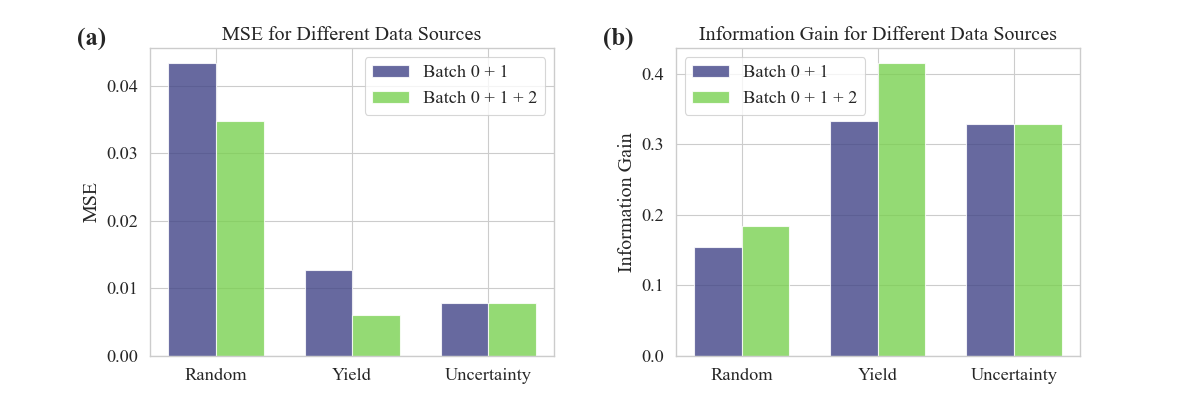

In [170]:
import numpy as np
import matplotlib.pyplot as plt

# Data
data_sources = ['Random', 'Yield', 'Uncertainty']
colors = plt.get_cmap('viridis')(np.linspace(0.2, 0.8, 2))

mse_values_1 = [random_mse_1, high_yield_mse_1, high_uncertainty_mse_1]
mse_values_2 = [random_mse_2, high_yield_mse_2, high_uncertainty_mse_2]

inf_gain_values_1 = [random_inf_gain_1, high_yield_gain_1, high_uncertainty_gain_1]
inf_gain_values_2 = [random_inf_gain_2, high_yield_gain_2, high_uncertainty_gain_2]

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

bar_width = 0.35
opacity = 0.8

# Adjust positions for 'batch 1' and 'batch 2' bars
bar_positions_1 = np.arange(len(data_sources))
bar_positions_2 = [x + bar_width for x in bar_positions_1]

# Plot MSE
axes[0].bar(bar_positions_1, mse_values_1, color=colors[0], width=bar_width, alpha=opacity, label='Batch 0 + 1')
axes[0].bar(bar_positions_2, mse_values_2, color=colors[1], width=bar_width, alpha=opacity, label='Batch 0 + 1 + 2')

axes[0].set_title('MSE for Different Data Sources')
axes[0].set_ylabel('MSE')
axes[0].set_xticks(bar_positions_1 + bar_width / 2)
axes[0].set_xticklabels(data_sources)
axes[0].text(-0.18, 1.01, "(a)", transform=axes[0].transAxes, size=18, weight='bold')

# Plot Information Gain
axes[1].bar(bar_positions_1, inf_gain_values_1, color=colors[0], width=bar_width, alpha=opacity, label='Batch 0 + 1')
axes[1].bar(bar_positions_2, inf_gain_values_2, color=colors[1], width=bar_width, alpha=opacity, label='Batch 0 + 1 + 2')

axes[1].set_title('Information Gain for Different Data Sources')
axes[1].set_ylabel('Information Gain')
axes[1].set_xticks(bar_positions_1 + bar_width / 2)
axes[1].set_xticklabels(data_sources)
axes[1].text(-0.18, 1.01, "(b)", transform=axes[1].transAxes, size=18, weight='bold')

# Add legends and space between subplots
axes[0].legend()
axes[1].legend()

plt.subplots_adjust(wspace=0.3)

# Show the plot
plt.show()


In [75]:
print(std_mesh_0.mean(), std_mesh_0_1.mean(), std_mesh_0_2.mean())

0.47109046467822624 0.3047383540905181 0.23903986309587977


In [76]:
print(std_mesh_0.std(), std_mesh_0_1.std(), std_mesh_0_2.std())

0.2684933962791134 0.2466117995535559 0.20359907691689397
